In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn stying
sns.set_theme()

# Read in csv
df = pd.read_csv('../data/raw/all_lyrics.csv')

In [2]:
df.head()

,track_name,artist,lyrics,release_date
0,Not Like Us by Kendrick Lamar,Kendrick Lamar,"Psst, I see dead people\n(\nMustard on the bea...",2024-05-04
1,HUMBLE. by Kendrick Lamar,Kendrick Lamar,Nobody pray for me\nIt been that day for me\nW...,2017-03-30
2,euphoria by Kendrick Lamar,Kendrick Lamar,​eurt s'em tuoba yas yeht gnihtyrevE\nEuphoria...,2024-04-30
3,m.A.A.d city by Kendrick Lamar (Ft. MC Eiht),Kendrick Lamar,[Refrain: Kendrick Lamar & \nScHoolboy Q\n]\nI...,2012-10-22
4,Swimming Pools (Drank) by Kendrick Lamar,Kendrick Lamar,"Pour up (Drank), head shot (Drank)\nSit down (...",2012-07-31


In [3]:
df.shape

(10378, 4)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10378 entries, 0 to 10377
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   track_name    10378 non-null  object
 1   artist        10378 non-null  object
 2   lyrics        10372 non-null  object
 3   release_date  9954 non-null   object
dtypes: object(4)
memory usage: 324.4+ KB


In [5]:
# Drop songs with no lyrics
df = df.dropna(subset = ['lyrics'])

In [6]:
# Get release_date into datetime
df['release_date'] = pd.to_datetime(df['release_date'])

Text(0.5, 1.0, 'Distribution of Track Release Dates')

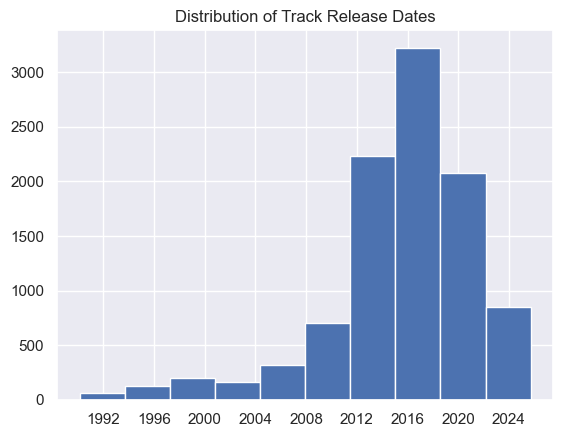

In [7]:
df['release_date'].hist()
plt.title('Distribution of Track Release Dates')

My research question is investigating topics in rap songs during the 2010s era. Would it be useful to filter for songs during this? I think so to keep the scope of my project simple.

In [8]:
df = df[(df['release_date'] >= '2010-01-01') & (df['release_date'] < '2020-01-01')]

Text(0.5, 1.0, 'Distribution of Track Release Dates After 2010')

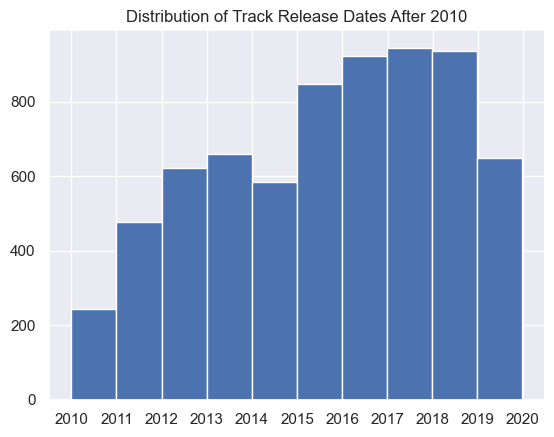

In [9]:
df[df['release_date'] != 'unreleased']['release_date'].hist()
plt.title('Distribution of Track Release Dates After 2010')

## Cleaning titles + lyrics

In [10]:
# Ensure lyrics are strings
df['lyrics'] = df['lyrics'].astype('string')

Remove artist name from track name

In [11]:
def remove_artist(track_name):
    """
    Removes artist name from track name 
    """
    return track_name.split(' by')[0]

df['track_name'] = df['track_name'].apply(remove_artist)

Remove newline, section labels (denoted by "[]"), ad-libs (denoted by "()"), tokenize, remove stopwords, and lemmatize.

In [14]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import contractions

# Tokenize + lematize + remove stopwords
def tokenize_and_lemmatize(text): 

    # Define stop words from english text (we are going to keep stopwords for POS tagging)
    # stop_words = set(stopwords.words('english'))

    # Remove \n
    text = text.replace('\n', ' ')

    # Remove section labels
    text = re.sub(r'\[.*?\]', '', text)

    # Remove ad-libs
    text = re.sub(r'\(.*?\)', '', text)

    # Fix contractions (ain't -> is not) as these are common in rap
    text = contractions.fix(text)

    # Tokenize
    tokens = word_tokenize(text)

    # Filter for strings
    words = [word.lower() for word in tokens if word.isalpha()]

    return words

# Clean lyrics
df['tokens'] = df['lyrics'].apply(tokenize_and_lemmatize)

One thing i didn't address previously was ad-libs. Rap is full of them, and they don't tend to be the most useful.

Export to csv

In [15]:
df = df.reset_index(drop = True)
df.to_csv('../data/processed/cleaned_lyrics.csv')